In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from scipy.ndimage import convolve1d

import models
import utils
import main

%load_ext autoreload
%autoreload 

logger = models.logger
logger(".")

2024-10-09 18:31:15 | .


utils::ISCOLORED=True


**SETTINGS definition**

In [2]:
NUM_BTSP_SAMPLES = 100
USE_BIAS = True

**Autoencoder**

In [3]:
# index of the autoencoder to load
idx = 0

# load
info, autoencoder = models.load_session(idx=idx)

# information
dim_ei = info["dim_ei"]
dim_ca3 = info["dim_ca3"]
dim_ca1 = info["dim_ca1"]
dim_eo = info["dim_eo"]
K_lat = info["K_lat"]
beta = info["beta"]
K = info["K"]

# number training samples used for the AE
num_samples = info["num_samples"]

# get parameters
W_ei_ca1, W_ca1_eo, B_ei_ca1, B_ca1_eo = autoencoder.get_weights(bias=USE_BIAS)

logger(f"{autoencoder=}")
logger("<<< Loaded session >>>")

2024-10-09 16:19:31 | Pre-selected session: [0]
/Users/daniekru/Research/lab/KAMemory/src/models.py:373: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(

{'K': 5,
 'K_lat': 15,
 'beta': 60,
 'dim_ca1': 50,
 'dim_ca3': 50,
 'dim_ei': 50,
 'dim_eo': 50,
 'epochs': 500,
 'loss_ae': 0.05726,
 'num_reconstructions': 1,
 'num_samples': 10000}


## ACCURACY MATRIX

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 66.32it/s]


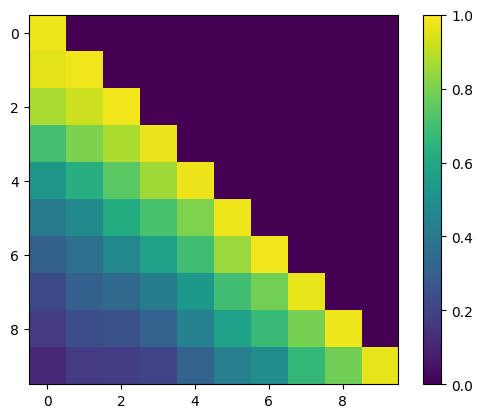

In [17]:
""" mtl training """

out, model, data = utils.train_for_accuracy(alpha=0.8, num_rep=100,
                                            num_samples=10)

plt.imshow(out.mean(axis=0), vmin=0, vmax=1); plt.colorbar();

2024-10-09 17:58:28 | Pre-selected session: [0]
2024-10-09 17:58:28 | info:
2024-10-09 17:58:28 | autoencoder=Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=50, bias=True)
  )
)
2024-10-09 17:58:28 | <<< Loaded session >>>
2024-10-09 17:58:28 | %MTL: MTL(dim_ei=50, dim_ca1=50, dim_ca3=50, dim_eo=50,  bias=True, beta=60, alpha=0.8, K_l=15, K_o=5


{'K': 5,
 'K_lat': 15,
 'beta': 60,
 'dim_ca1': 50,
 'dim_ca3': 50,
 'dim_ei': 50,
 'dim_eo': 50,
 'epochs': 500,
 'loss_ae': 0.05726,
 'num_reconstructions': 1,
 'num_samples': 10000}


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 71.68it/s]


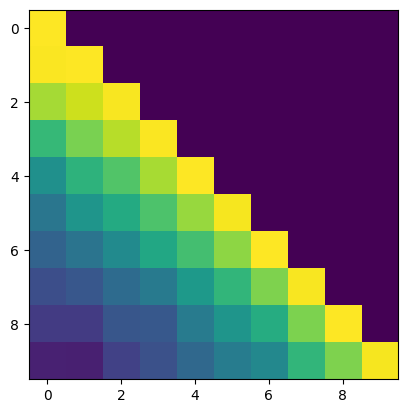

In [3]:
""" mtl training """

out, model, data = utils.train_for_accuracy(alpha=0.8, num_rep=100,
                                            num_samples=10)

plt.imshow(out.sum(axis=0));

In [9]:
data[-1][-1].dataset.tensors[0]

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       

## Reconstruction

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.55it/s]


data: torch.Size([50, 50])
num: 50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 5818.80it/s]


data: torch.Size([50, 50])
num: 50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 5685.19it/s]


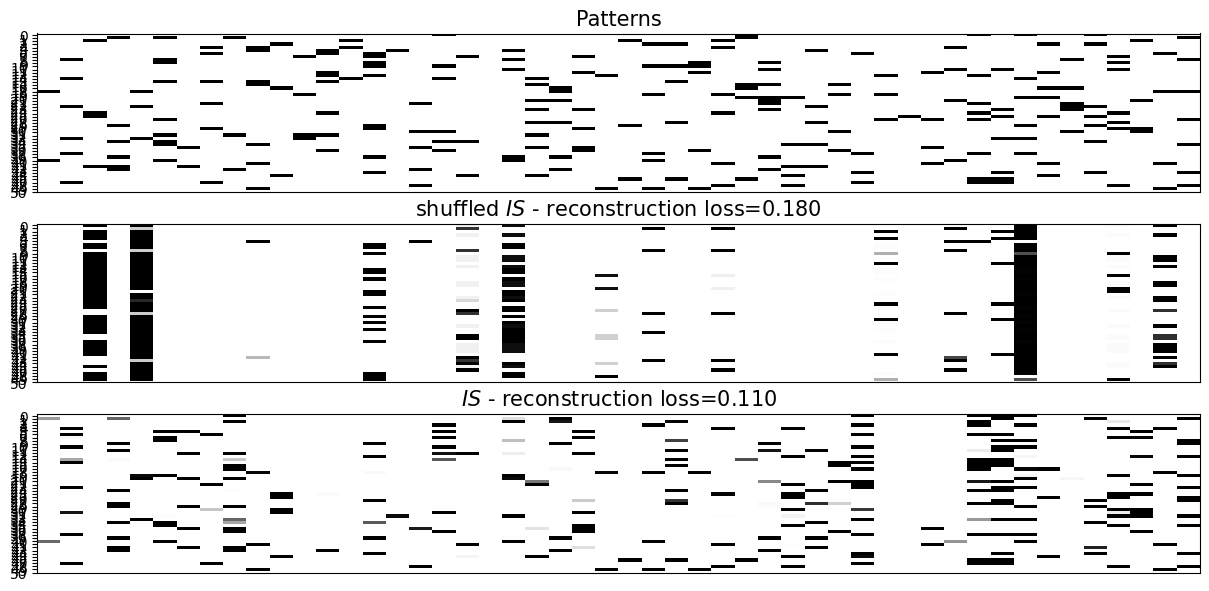

In [118]:
utils.train_for_reconstruction(alpha=0.3, num_samples=50, verbose=False)

## BTSP weight plot

In [57]:
verbose = False
num_samples = 10
num_rep = 1
alpha = 0.8
complete_dataset = None

# --- load autoencoder
info, autoencoder = models.load_session(
    idx=0, verbose=verbose)

# information
dim_ei = info["dim_ei"]
dim_ca3 = info["dim_ca3"]
dim_ca1 = info["dim_ca1"]
dim_eo = info["dim_eo"]
K_lat = info["K_lat"]
beta = info["beta"]
K = info["K"]

# number training samples used for the AE
# num_samples = info["num_samples"]

# get parameters
W_ei_ca1, W_ca1_eo, B_ei_ca1, B_ca1_eo = autoencoder.get_weights(
                            bias=True)

if verbose:
    logger(f"{autoencoder=}")
    logger("<<< Loaded session >>>")

# --- make model

# get weights from the autoencoder
if True:
    W_ei_ca1, W_ca1_eo, B_ei_ca1, B_ca1_eo = autoencoder.get_weights(bias=True)
else:
    W_ei_ca1, W_ca1_eo = autoencoder.get_weights(bias=False)
    B_ei_ca1 = None
    B_ca1_eo = None

# make model
model = models.MTL(W_ei_ca1=W_ei_ca1,
            W_ca1_eo=W_ca1_eo,
            B_ei_ca1=B_ei_ca1,
            B_ca1_eo=B_ca1_eo,
            dim_ca3=dim_ca3,
            K_lat=K_lat,
            K_out=K,
            alpha=alpha,
            beta=beta,
            shuffled_is=False)

if verbose:
    logger(f"%MTL: {model}")

#
record = np.zeros((num_rep, num_samples, dim_ca3, dim_ca3))
pre_w = np.zeros((num_rep, num_samples, dim_ca3, dim_ca3))
ca3 = np.zeros((num_rep, num_samples, dim_ca3))


#
for l in tqdm(range(num_rep)):

    # --- make new data
    stimuli = utils.sparse_stimulus_generator(N=num_samples,
                                        K=K,
                                        size=dim_ei,
                                        plot=False)
    data = torch.tensor(stimuli[:num_samples+1], dtype=torch.float32)
    dataloader = DataLoader(TensorDataset(data),
                            batch_size=1,
                            shuffle=False)
    # reset the model
    model.reset()

    # train a dataset with pattern index 0.. i
    model.eval()
    with torch.no_grad():

        # one pattern at a time
        for i, batch in enumerate(dataloader):

            pre_w[l, i] = model.W_ca3_ca1.detach().numpy()

            # forward
            _ = model(batch[0].reshape(-1, 1))

            record[l, i] = model.last_dw.detach().numpy()
            ca3[l, i] = model._ca3.detach().numpy().flatten()

logger(".")

/Users/daniekru/Research/lab/KAMemory/src/models.py:377: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(f"{cache_dir}/{session}/autoencoder.p

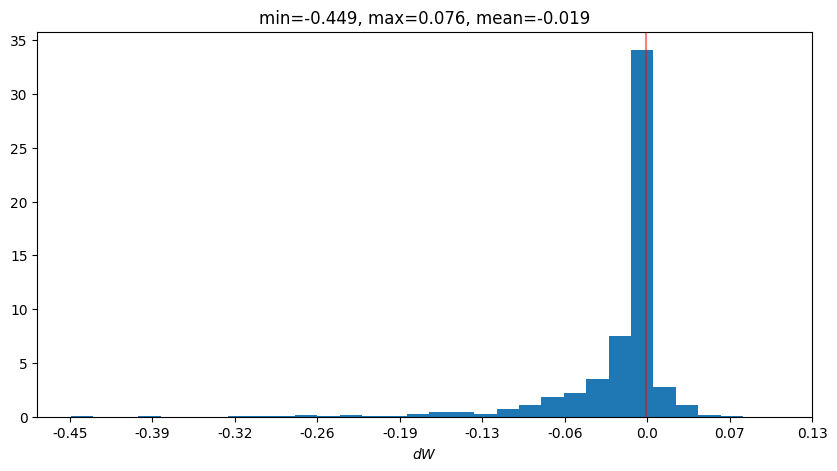

In [26]:
r = record.mean(axis=0).mean(axis=0).flatten()

plt.figure(figsize=(10, 5))
plt.axvline(0, color="red", linestyle="-", alpha=0.5)
plt.hist(r, bins=30, density=True)
plt.title(f"min={r.min():.3f}, max={r.max():.3f}, mean={r.mean():.3f}")
plt.xlabel("$dW$")
plt.xticks(np.linspace(-0.45, 0.13, 10),
           np.around(np.linspace(-0.45, 0.13, 10), 2))
plt.show()

In [35]:
r.max()

np.float64(0.7085638293880038)

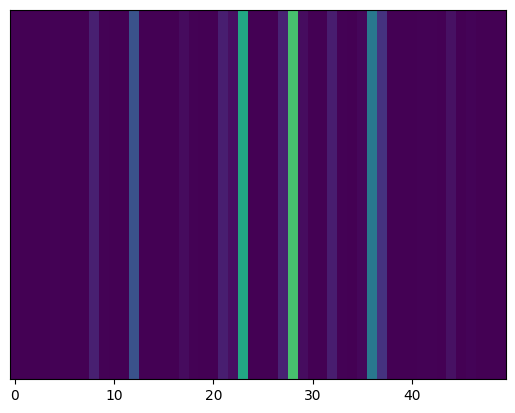

In [35]:
plt.imshow(ca3.mean(axis=0)[0].reshape(1, -1), aspect="auto", vmin=0, vmax=1)
plt.yticks(())
plt.show()

In [36]:
ca3.shape

(1, 10, 50)

In [37]:
pre_w.shape

(1, 10, 50, 50)

In [39]:
record.shape

(1, 10, 50, 50)

**single epoch**

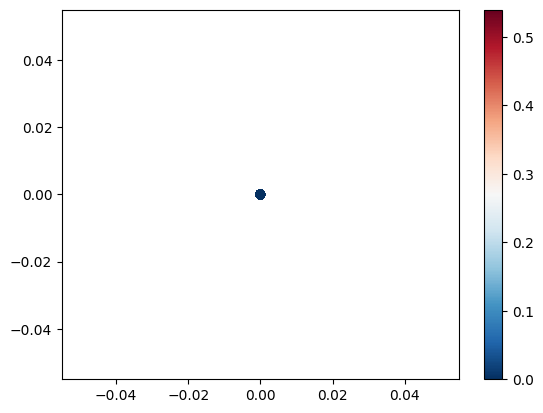

In [90]:
k = 0

# 1 if the ca3 cell is active 0 otherwise
mask_ca3_present = np.where(ca3[0, k] > 0.001, 1, 0).reshape(-1, 1)

# weights before the update when ca3 isn't present
pre_w_non_is = pre_w[0, k] * (1 - mask_ca3_present) 
idxs_pre_w_non_is = np.where(pre_w_non_is.sum(axis=1) > 0.)

# delta when ca3 isn't present
dw_non_is = record[0, k] * (1 - mask_ca3_present)

plt.scatter(x=[0]*len(pre_w_non_is.flatten()),
            y=pre_w_non_is.flatten().tolist(),
            c=dw_non_is.flatten(),
            cmap="RdBu_r")#, vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.show()

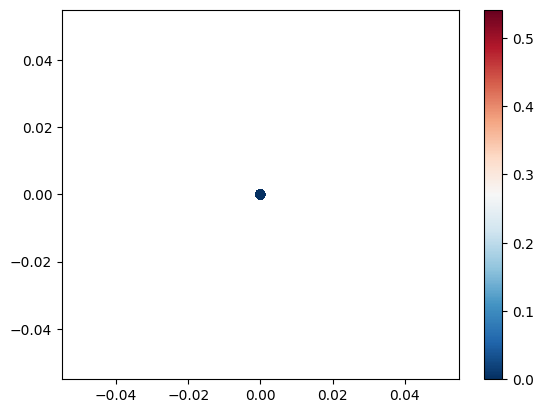

In [86]:
plt.scatter(x=[0]*len(pre_w_non_is.flatten()),
            y=pre_w_non_is.flatten().tolist(),
            c=dw_non_is.flatten(),
            cmap="RdBu_r")#, vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.show()

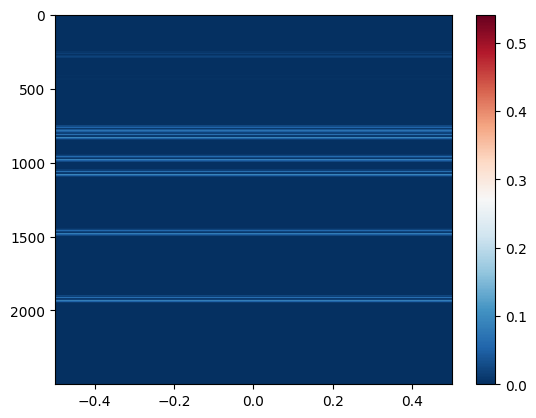

In [65]:
plt.imshow(dw_non_is.reshape(-1, 1), cmap="RdBu_r", aspect="auto")
plt.colorbar()
plt.show()